In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = yf.download("RELIANCE.NS", period="2y", interval="1d")
df = pd.DataFrame(data)

/tmp/ipython-input-852180684.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [3]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

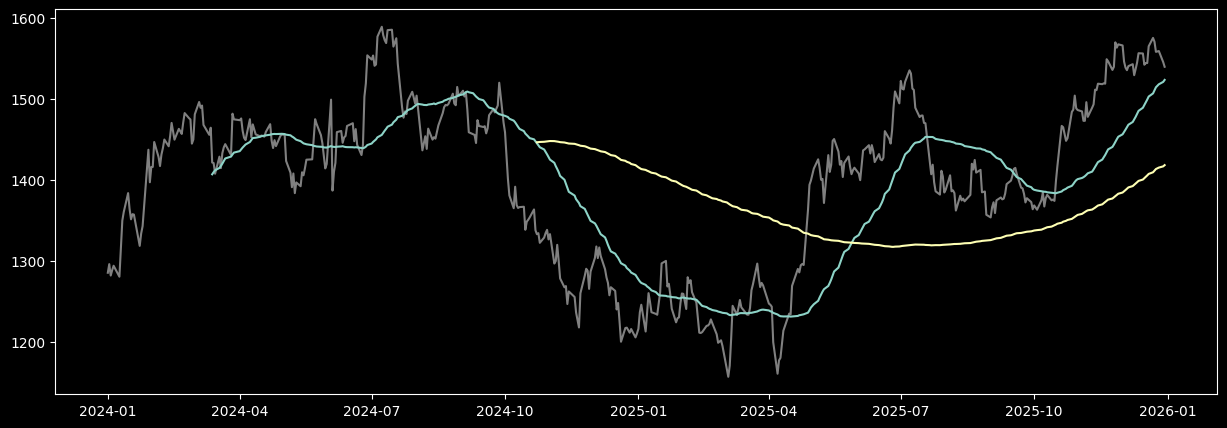

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color='grey')
plt.plot(df['SMA_50'])
plt.plot(df['SMA_200'])
plt.show()

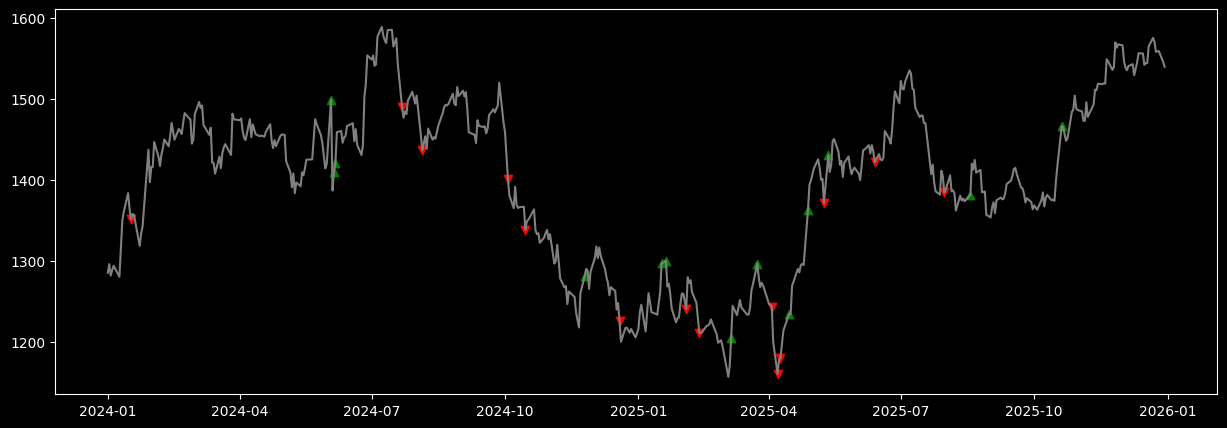

In [5]:
prev = df['Close'].shift(1)
gap_up_days = df[df['Open']>1.01*prev]
gap_down_days = df[df['Open']<0.99*prev]

#############################################################################################################
#The graph was very congested, showing all days as gap-ups and gap-downs.

#According to the information I got on the internet, there's always a gap of a few paise.

#Therefore, to make things reasonable, I only showed gap days that have a difference of at least 1%.
#############################################################################################################
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color='grey')
plt.scatter(gap_up_days.index, gap_up_days['Close'], color='green', marker='^')
plt.scatter(gap_down_days.index, gap_down_days['Close'], color='red', marker='v')
plt.show()

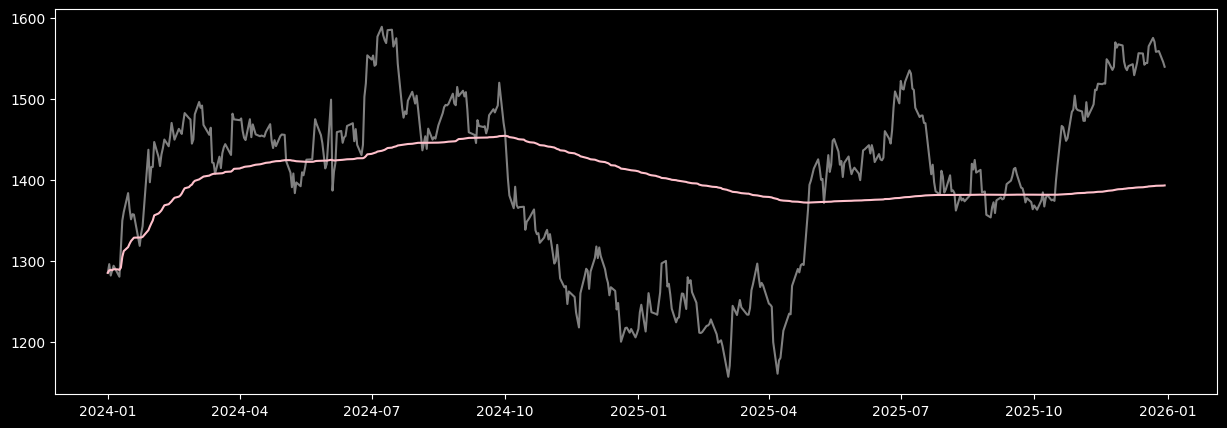

In [6]:
typical_price = (df['High']+df['Low']+df['Close'])/3
df['VWAP'] = (typical_price*df['Volume']).cumsum()/df['Volume'].cumsum()

plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color='grey')
plt.plot(df['VWAP'], color='pink')
plt.show()